In [1]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from lightgbm import LGBMRegressor
from lightgbm import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from utils import preprocess

In [2]:
# reload external python modules; automatically
%load_ext autoreload
%autoreload 2

In [3]:
# data source
train_data_file = './processed_data/processed_train.csv'
test_data_file = './processed_data/processed_test.csv'

# 1. Linear Model

In [ ]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

In [5]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

## 1.1. linear regression model

### train linear regression model

In [6]:
all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']

regressor = LinearRegression()
regressor.fit(
    X=X_train,
    y=y_train,
)
y_hat_train = regressor.predict(X_train)
y_hat_test = regressor.predict(X_test)

### evaluate linear regression model

In [7]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  991702.4406246099
train_MSE:  5829494987978.709
train_RMSE:  2414434.713960746
score_train:  0.7453176296046737
test_MAE:  1051036.320611237
test_MSE:  8946766102916.53
test_RMSE:  2991114.5252090446
score_test:  0.6622919390693183


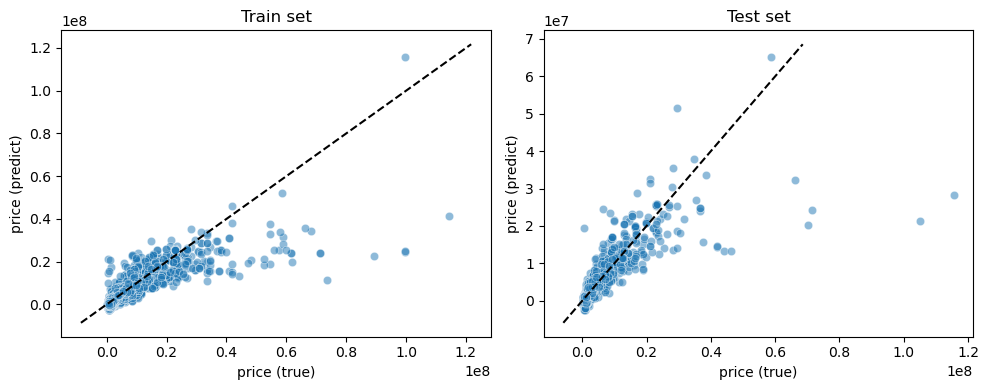

In [8]:
outputs = 'price'
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.2. kernel ridge regression model

### train kernel ridge regression model

In [9]:
kernel_model = KernelRidge(alpha=1.0, kernel='linear')
kernel_model.fit(X_train, y_train)
y_hat_train_linear = kernel_model.predict(X_train)
y_hat_test_linear = kernel_model.predict(X_test)

### evaluate kernel ridge regression model

In [10]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_linear, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_linear, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_linear, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_linear, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_linear, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_linear, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  989244.6039735766
train_MSE:  5836904164212.906
train_RMSE:  2415968.576826467
score_train:  0.7453176296046737
test_MAE:  1047415.7933515257
test_MSE:  8959109599353.037
test_RMSE:  2993177.1747347396
score_test:  0.6622919390693183


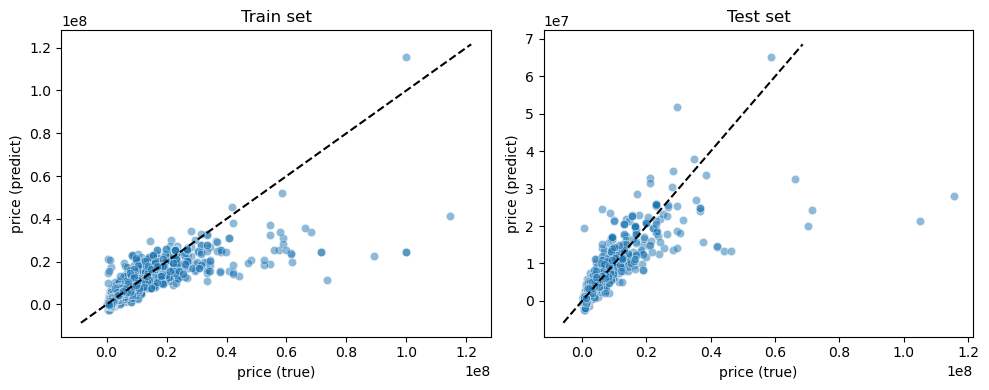

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_linear,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_linear,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.3. polynomial kernel regression model

### train polynomial kernel regression model

In [12]:
kernel_model = KernelRidge(alpha=1.0, kernel='polynomial', degree=3)
kernel_model.fit(X_train, y_train)
y_hat_train_polynomial = kernel_model.predict(X_train)
y_hat_test_polynomial = kernel_model.predict(X_test)

### evaluate polynomial kernel regression model

In [13]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_polynomial, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_polynomial, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_polynomial, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_polynomial, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_polynomial, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_polynomial, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  542182.4181483068
train_MSE:  1595742963726.9475
train_RMSE:  1263227.2019422902
score_train:  0.7453176296046737
test_MAE:  784876.5506077897
test_MSE:  34838933913671.21
test_RMSE:  5902451.51726562
score_test:  0.6622919390693183


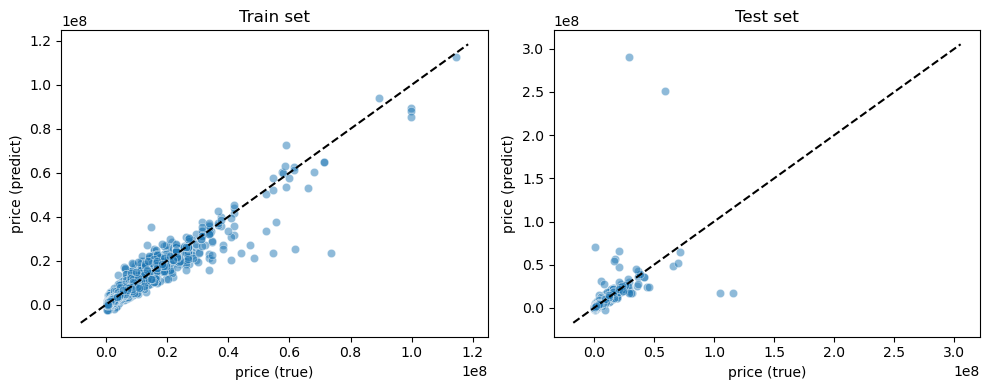

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_polynomial,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_polynomial,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.4. RBF kernel regression model 

### train RBF kernel regression model

In [15]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.08)
kernel_model.fit(X_train, y_train)
y_hat_train_rbf = kernel_model.predict(X_train)
y_hat_test_rbf = kernel_model.predict(X_test)

### evaluate RBF kernel regression model

In [16]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train)))
print('score_train: ', regressor.score(X_train, y_train))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test)))
print('score_test: ', regressor.score(X_test, y_test))

train_MAE:  801686.0214035263
train_MSE:  4496472804334.881
train_RMSE:  2120488.8125936626
score_train:  0.7453176296046737
test_MAE:  1467148.1235339015
test_MSE:  20768610362366.656
test_RMSE:  4557259.084402231
score_test:  0.6622919390693183


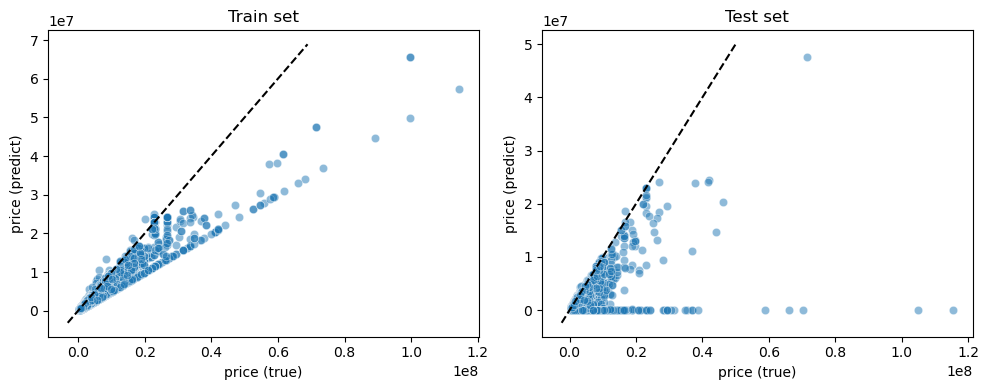

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.5. standardized RBF kernel regression model

### standardize RBF attributes

In [18]:
normalized_data = preprocessing.StandardScaler()
train_rbf = pd.DataFrame(normalized_data.fit_transform(df_train_8[all_X_att_train]), index=df_train_8.index, columns=all_X_att_train)
test_rbf = pd.DataFrame(normalized_data.fit_transform(df_test_2[all_X_att_train]), index=df_test_2.index, columns=all_X_att_train)

X_train_rbf, X_test_rbf, y_train_rbf, y_test_rbf = train_rbf[all_X_att_train], test_rbf[all_X_att_train], df_train_8['price'], df_test_2['price']

### train RBF model with standardized data

In [19]:
kernel_model = KernelRidge(alpha=1.0, kernel='rbf', gamma=0.2)
kernel_model.fit(X_train_rbf, y_train_rbf)
y_hat_train_rbf = kernel_model.predict(X_train_rbf)
y_hat_test_rbf = kernel_model.predict(X_test_rbf)

### evaluate RBF model with standardized data

In [20]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train_rbf, y_train_rbf))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf))
print('train_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_train_rbf, y_train_rbf)))
print('score_train: ', regressor.score(X_train_rbf, y_train_rbf))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test_rbf, y_test_rbf))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test_rbf, y_test_rbf)))
print('score_test: ', regressor.score(X_test_rbf, y_test_rbf))


train_MAE:  427204.84179973253
train_MSE:  2409086516487.178
train_RMSE:  1552123.228512214
score_train:  -23834.6667927221
test_MAE:  748134.9184539968
test_MSE:  11800520880323.766
test_RMSE:  3435188.6236892096
score_test:  -20591.274127176697


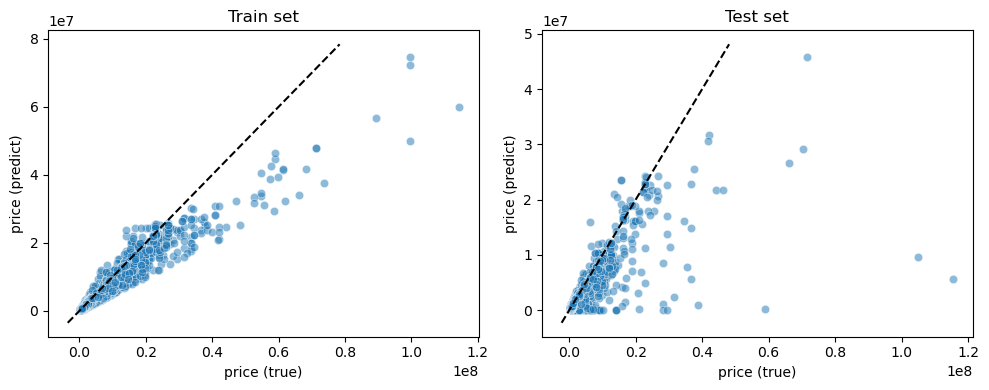

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train_rbf.ravel(),
    y=y_hat_train_rbf,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test_rbf.ravel(),
    y=y_hat_test_rbf,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.plot(a.get_ylim(), a.get_ylim(), ls='--', c='k')

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

## 1.6. Model performance
* linear regression models show a similar large RMSE metric and from comparasion plot of precited price and groud-truth price, we can see linear models can basically catch price change directions but not very precisely.

# 2. Light Gradient Boosting Machine (LightGBM) Model

Light Gradient Boosting Machine (LightGBM) is a distributed gradient boosting (Gradient Boosting Decision Tree, GBDT) framework based on decision tree algorithm. In the data environment of large training samples and high-dimensional features, compared with GBDT, LightGBM has faster training speed and efficiency, lower memory usage, better accuracy, supports parallel learning and can process large-scale data.

In [124]:
df_train = pd.read_csv(train_data_file)
df_test = pd.read_csv(test_data_file)

df_train = df_train.drop(['pa_ang_mo_kio', 'pa_bedok', 'pa_bishan', 
                       'pa_boon_lay', 'pa_bukit_batok', 'pa_bukit_merah', 
                       'pa_bukit_panjang', 'pa_bukit_timah', 'pa_central_water_catchment', 
                       'pa_changi', 'pa_changi_bay', 'pa_choa_chu_kang', 'pa_clementi', 
                       'pa_downtown_core', 'pa_geylang', 'pa_hougang', 'pa_jurong_east', 
                       'pa_jurong_west', 'pa_kallang', 'pa_lim_chu_kang', 'pa_mandai', 
                       'pa_marina_south', 'pa_marine_parade', 'pa_museum', 'pa_newton', 
                       'pa_north-eastern_islands', 'pa_novena', 'pa_orchard', 'pa_outram', 
                       'pa_pasir_ris', 'pa_paya_lebar', 'pa_pioneer', 'pa_punggol', 
                       'pa_queenstown', 'pa_river_valley', 'pa_rochor', 'pa_seletar', 
                       'pa_sembawang', 'pa_sengkang', 'pa_serangoon', 'pa_simpang', 
                       'pa_singapore_river', 'pa_southern_islands', 'pa_straits_view', 
                       'pa_sungei_kadut', 'pa_tampines', 'pa_tanglin', 'pa_tengah', 
                       'pa_toa_payoh', 'pa_tuas', 'pa_western_islands', 
                       'pa_western_water_catchment', 'pa_woodlands', 'pa_yishun', 
                       'pt_apartment', 'pt_bungalow', 'pt_cluster_house', 
                       'pt_condo', 'pt_conservation_house', 'pt_corner_terrace', 
                       'pt_executive_condo', 'pt_good_class_bungalow', 'pt_hdb', 
                       'pt_land_only', 'pt_landed', 'pt_semi-detached_house', 
                       'pt_shophouse', 'pt_terraced_house', 'pt_townhouse', 'pt_walk-up'], axis=1)


df_test = df_test.drop(['pa_ang_mo_kio', 'pa_bedok', 'pa_bishan', 
                       'pa_boon_lay', 'pa_bukit_batok', 'pa_bukit_merah', 
                       'pa_bukit_panjang', 'pa_bukit_timah', 'pa_central_water_catchment', 
                       'pa_changi', 'pa_changi_bay', 'pa_choa_chu_kang', 'pa_clementi', 
                       'pa_downtown_core', 'pa_geylang', 'pa_hougang', 'pa_jurong_east', 
                       'pa_jurong_west', 'pa_kallang', 'pa_lim_chu_kang', 'pa_mandai', 
                       'pa_marina_south', 'pa_marine_parade', 'pa_museum', 'pa_newton', 
                       'pa_north-eastern_islands', 'pa_novena', 'pa_orchard', 'pa_outram', 
                       'pa_pasir_ris', 'pa_paya_lebar', 'pa_pioneer', 'pa_punggol', 
                       'pa_queenstown', 'pa_river_valley', 'pa_rochor', 'pa_seletar', 
                       'pa_sembawang', 'pa_sengkang', 'pa_serangoon', 'pa_simpang', 
                       'pa_singapore_river', 'pa_southern_islands', 'pa_straits_view', 
                       'pa_sungei_kadut', 'pa_tampines', 'pa_tanglin', 'pa_tengah', 
                       'pa_toa_payoh', 'pa_tuas', 'pa_western_islands', 
                       'pa_western_water_catchment', 'pa_woodlands', 'pa_yishun', 
                       'pt_apartment', 'pt_bungalow', 'pt_cluster_house', 
                       'pt_condo', 'pt_conservation_house', 'pt_corner_terrace', 
                       'pt_executive_condo', 'pt_good_class_bungalow', 'pt_hdb', 
                       'pt_land_only', 'pt_landed', 'pt_semi-detached_house', 
                       'pt_shophouse', 'pt_terraced_house', 'pt_townhouse', 'pt_walk-up'], axis=1)

In [125]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

### train Light Gradient Boosting Machine (LightGBM) Model

### 2.1. Histogram algorithm

LightGBM uses a histogram-based algorithm to discretize continuous eigenvalues into K integers, construct a histogram with a width of K, traverse the training data, and count the cumulative statistics of each discrete value in the histogram. When selecting the split points of a feature, it is only necessary to traverse the discrete values of the sorted histogram. 

The use of the histogram algorithm reduces the computational cost of the algorithm. The pre-sort adopted by XGBoost needs to traverse each eigenvalue and calculate the split gain, while the histogram algorithm only needs to calculate K times, which improves the efficiency of finding split points; reduces the memory of the algorithm Consumption, it is not necessary to store the pre-sorted results, only the discretized values of the features need to be saved. 

Because the decision tree itself is a weak learner, the use of the histogram to discretize the eigenvalues can have a regularization effect, and the discretized split points can improve the generalization ability of the algorithm.

### 2.2. Leaf-wise algorithm

Most decision tree learning algorithms use a level-wise strategy for tree generation. The difference is that LightGBM adopts a more efficient leaf-wise strategy.

The strategy finds a leaf node with the largest splitting gain from all the leaf nodes of the current decision tree each time, and then splits it, and so on. Such a mechanism reduces the split calculation of leaf nodes with lower gains and reduces a lot of unnecessary overhead.

Compared with the level-wise strategy, leaf-wise can reduce the error and get better accuracy with the same number of splits. The disadvantage of the leaf-wise algorithm is that it may generate deeper decision trees. Therefore, LightGBM adds parameters that limit the maximum depth to leaf-wise, which prevents overfitting while ensuring the efficiency of the algorithm.



In [139]:
all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']
### train RBF model with standardized data

In [140]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)

In [141]:
estimator = LGBMRegressor(objective='regression', learning_rate=0.1, metric='rmse', 
                          min_child_weight=0.001, colsample_bytree=0.9)

- boosting: default=gbdt, type=enum, options=gbdt, rf, dart, goss, alias=boost, boosting_type

gbdt, traditional gradient boosted decision tree

rf, Random Forest

dart, Dropouts meet Multiple Additive Regression Trees

goss, Gradient-based One-Side Sampling

- objective, default=regression, type=enum, options=regression, regression_l1, huber, fair, poisson, quantile, quantile_l2, binary, multiclass, multiclassova, xentropy, xentlambda, lambdarank, alias=objective, app , application

regression application

regression_l2, L2 loss, alias=regression, mean_squared_error, mse

regression_l1, L1 loss, alias=mean_absolute_error, mae

huber, huber loss

fair, fair loss

poisson, Poisson regression

quantile, Quantile regression

quantile_l2, similar to quantile, but uses L2 loss

- learning_rate, default=0.1, type=double, alias=shrinkage_rate

In dart, shrinkage rate also affects the normalized weight of dropped trees

- metric, default={l2 for regression}, {binary_logloss for binary classification}, {ndcg for lambdarank}, type=multi-enum, options=l1, l2, ndcg, auc, binary_logloss, binary_error …

l1, absolute loss, alias=mean_absolute_error, mae

l2, square loss, alias=mean_squared_error, mse

l2_root, root square loss, alias=root_mean_squared_error, rmse

quantile, Quantile regression

huber, huber loss

fair, fair loss

poisson, Poisson regression

ndcg, NDCG

map, MAP

auc, AUC

binary_logloss, log loss

In [156]:
param_grid = {
    'max_depth':[4, 5, 6],
    'num_leaves':[25, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators':[100, 150, 200],
    'min_child_samples': [5, 10, 15],
    'subsample': [0.9, 1.0]
}

- max_depth, default=-1, type=int

Limit the maximum depth of the tree model. This prevents overfitting when #data is small. The tree can still grow leaf-wise.

&lt; 0 means no limit.

- num_leaves, default=31, type=int, alias=num_leaf

number of leaves on a tree

- min_data_in_leaf, default=20, type=int, alias=min_data_per_leaf , min_data, min_child_samples

The minimum amount of data on a leaf. 

Can be used to deal with overfitting.

- bagging_fraction, default=1.0, type=double, 0.0 &lt; bagging_fraction &lt; 1.0, alias=sub_row, subsample

Similar to feature_fraction, but it will randomly select parts of the data without resampling

Can be used to speed up training

Can be used to deal with overfitting

Note: In order to enable bagging, bagging_freq should be set to a non-zero value

In [157]:
lightGBM_model = GridSearchCV(estimator, param_grid, verbose=3, cv=5, scoring='neg_mean_squared_error')
lightGBM_model.fit(X_scaled, y_train)

joblib.dump(lightGBM_model, 'gbm_model.pkl')
print('Best parameters found by grid search are:', lightGBM_model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-5728688544016.592 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-8383434766949.294 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-9796621553202.650 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-7805058237904.978 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-4724955218357.216 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=1.0;, score=-5728688544016

[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=0.9;, score=-5882693492845.134 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=0.9;, score=-7570718344823.184 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=0.9;, score=-5628483754747.726 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=0.9;, score=-2866319527467.624 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-4129225960841.671 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-5882693492845.134 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=0.9;, score=-5430605905909.174 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-5434460879533.732 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-9136470284412.828 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-10233633223776.805 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-8066864695242.635 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-5430605905909.174 total time=   0.1s
[CV 1/5] END learning_rate=0.01, 

[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-3215108196234.910 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-5826548728010.336 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-7027831306973.292 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-4933492637479.917 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-2870017493755.594 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=30, subsample=0.9;, score=-3215108196234.910 total time=   0.4s
[CV 2/5] END learning_rate=0.01, m

[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-10289149714581.594 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-8291816819887.416 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-5479635266877.793 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-3721163295943.935 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-7281139876512.297 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-8297081988422.789 total time=   0.1s
[CV 4/5] END learning_rate=0.01, 

[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-2963431114851.489 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-3010473359613.022 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-6142966664065.434 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-7317795326657.404 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-5131221121571.027 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-2963431114851.489 total time=   0.1s
[CV 1/5] END learning_rate=0.01, m

[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-5085247525785.123 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-8056686781676.913 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-5308892107940.622 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-2473184750368.326 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-3480546527830.129 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5085247525785.123 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_dep

[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-4898997296516.543 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-8362904824718.948 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-10006839474691.592 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-7550956349618.761 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-4898950508308.986 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=0.9;, score=-4869480250968.672 total time=   0.1s
[CV 2/5] END learning_rate=0.01, 

[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-8111714431057.479 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-5338771900531.976 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-3124603668034.390 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-2714956954960.547 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-5110997374679.131 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-7180357678779.127 total time=   0.2s
[CV 4/5] END learning_rate=0.01, m

[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=1.0;, score=-4952869937231.202 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-4968282195848.922 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-8926313707212.539 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-10045910244802.984 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-7812595138125.252 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-4943157479959.099 total time=   0.3s
[CV 1/5] END learning_rate=0.01, 

[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-5589283829631.224 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-7369659057776.707 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-4825691899726.073 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2522506440079.404 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-2700579738349.531 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-5589283829631.224 total time=   0.2s
[CV 3/5] END learning_rate=0.01, m

[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=0.9;, score=-5060712908710.579 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=0.9;, score=-2538613030276.202 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-3473324427605.379 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-5125678440091.146 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-8055206919886.497 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-5060712908710.579 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_dep

[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-2690945231721.406 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-3729429374036.376 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-7611911291000.188 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-4251431580376.877 total time=   0.3s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-1753057055111.898 total time=   0.3s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=0.9;, score=-4812506162331.510 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_de

[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5840858190900.942 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-7808532321529.776 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5105616874066.044 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-3050739417978.005 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-3092486426649.094 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-5909101900372.205 total time=   0.2s
[CV 3/5] END learning_rate=0.01, m

[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=1.0;, score=-9849193859516.572 total time=   0.1s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=1.0;, score=-7730813327103.097 total time=   0.1s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=1.0;, score=-4931226859062.874 total time=   0.1s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-4858731739830.929 total time=   0.1s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-8576107258873.626 total time=   0.1s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-9837632295510.266 total time=   0.1s
[CV 4/5] END learning_rate=0.01, m

[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=1.0;, score=-5591202489865.464 total time=   0.4s
[CV 5/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=1.0;, score=-3110388234549.881 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-2597379473854.348 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-5319227791302.640 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-7197381473802.665 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-4848051398593.352 total time=   0.2s
[CV 5/5] END learning_rate=0.01, m

[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=0.9;, score=-3525991006205.372 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=0.9;, score=-1581044935523.180 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=1.0;, score=-2800188614135.457 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=1.0;, score=-2461653870427.037 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=1.0;, score=-5849429118956.665 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=100, num_leaves=40, subsample=1.0;, score=-3525991006205.372 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_dep

[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=1.0;, score=-2846721653288.084 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=1.0;, score=-1982630174944.000 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=1.0;, score=-5868335260552.449 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=1.0;, score=-3395836419893.103 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=1.0;, score=-1798768120229.130 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=0.9;, score=-2846721653288.084 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=1.0;, score=-5419348277387.113 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=1.0;, score=-3608082337245.638 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=1.0;, score=-2073817345254.164 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=0.9;, score=-2542408507426.586 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=0.9;, score=-3062755479656.427 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=0.9;, score=-5419348277387.113 total time=   0.1s
[CV 4/5] END learning_rate=0.05, m

[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=1.0;, score=-1923646684798.792 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=0.9;, score=-2380559805162.575 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=0.9;, score=-4103210085547.696 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=0.9;, score=-5996078867018.679 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=0.9;, score=-4214133182004.135 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=0.9;, score=-2070271157010.618 total time=   0.1s
[CV 1/5] END learning_rate=0.05, m

[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=0.9;, score=-5716767446342.427 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=0.9;, score=-4047758218415.597 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=0.9;, score=-1963014872718.424 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=1.0;, score=-2327374151870.220 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=1.0;, score=-3648351951680.131 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=4, min_child_samples=15, n_estimators=150, num_leaves=40, subsample=1.0;, score=-5716767446342.427 total time=   0.1s
[CV 4/5] END learning_rate=0.05, m

[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=0.9;, score=-3324305525173.617 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=0.9;, score=-1325620906428.480 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=1.0;, score=-2388973567414.800 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=1.0;, score=-2313705765890.838 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=1.0;, score=-5809684797210.968 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=100, num_leaves=30, subsample=1.0;, score=-3324305525173.617 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_dep

[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=25, subsample=1.0;, score=-1955269463379.816 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=25, subsample=1.0;, score=-5956259206459.238 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=25, subsample=1.0;, score=-3242446705250.395 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=25, subsample=1.0;, score=-1528124709532.030 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2398973877355.887 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=5, n_estimators=200, num_leaves=30, subsample=0.9;, score=-1928968671294.650 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_dep

[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=0.9;, score=-2332773887363.874 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=0.9;, score=-2700787311301.603 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=0.9;, score=-5507327816186.200 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=0.9;, score=-3588911564298.521 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=0.9;, score=-1972431395556.663 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=25, subsample=1.0;, score=-2332773887363.874 total time=   0.1s
[CV 2/5] END learning_rate=0.05, m

[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=0.9;, score=-2429994654391.757 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=0.9;, score=-5414200274831.968 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=0.9;, score=-3472650342678.751 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=0.9;, score=-1954856815115.557 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=1.0;, score=-2470766547731.482 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=10, n_estimators=200, num_leaves=40, subsample=1.0;, score=-2429994654391.757 total time=   0.1s
[CV 3/5] END learning_rate=0.05, m

[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=0.9;, score=-5919449796583.725 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=0.9;, score=-3825257898276.264 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=0.9;, score=-1738600349596.598 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=1.0;, score=-2200908165313.363 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=1.0;, score=-3488131329058.478 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=5, min_child_samples=15, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5919449796583.725 total time=   0.2s
[CV 4/5] END learning_rate=0.05, m

[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-3384362334802.047 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=0.9;, score=-1261928580117.133 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2509832693878.587 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2165605588032.068 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=1.0;, score=-5759982179115.570 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=100, num_leaves=25, subsample=1.0;, score=-3384362334802.047 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_dep

[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-2247346057225.187 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-1961781454384.115 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-6069312706449.111 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-3345903296003.126 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=40, subsample=1.0;, score=-1437546999867.166 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=25, subsample=0.9;, score=-2400683585553.377 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_dep

[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-6231509087303.003 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-3511615525538.342 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=1.0;, score=-1843218321545.516 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=40, subsample=0.9;, score=-2302092301181.549 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=40, subsample=0.9;, score=-3133531087811.509 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=100, num_leaves=40, subsample=0.9;, score=-5988133007718.839 total time=   0.1s
[CV 4/5] END learning_rate=0.05, m

[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-3496725991025.604 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=1.0;, score=-1643195882728.140 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2408789887432.445 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2412690537115.499 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=30, subsample=0.9;, score=-5905901375800.751 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=10, n_estimators=200, num_leaves=30, subsample=0.9;, score=-3425190695938.133 total time=   0.1s
[CV 5/5] END learning_rate=0.05, m

[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-2289285891245.233 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-3235252411882.351 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-5786779624143.519 total time=   0.1s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-3902535649562.227 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=0.9;, score=-1565950073649.710 total time=   0.1s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=150, num_leaves=25, subsample=1.0;, score=-2289285891245.233 total time=   0.1s
[CV 2/5] END learning_rate=0.05, m

[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-3013411067165.849 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-6035413277285.572 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-3719568458498.502 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-1469029172849.260 total time=   0.3s
[CV 1/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=1.0;, score=-2271151852059.520 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=1.0;, score=-3013411067165.849 total time=   0.2s
[CV 3/5] END learning_rate=0.05, m

[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-3394792345972.948 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-1624430471595.932 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-2726457278252.820 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-1932463587492.550 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5726700783342.445 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=1.0;, score=-3394792345972.948 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, m

[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2582027606137.915 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2704890242004.566 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-5401211385075.581 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-3628252179868.350 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-1980901212608.775 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=100, num_leaves=30, subsample=0.9;, score=-2582027606137.915 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-1961368061894.330 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-2507237943568.673 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-2288813782540.910 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-4949788724088.875 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-3446153790632.830 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=10, n_estimators=200, num_leaves=25, subsample=0.9;, score=-1920142376004.012 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-1929845498540.819 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-2299202519374.000 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-3576436651297.472 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-5632692741528.023 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-4091371969047.523 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=1.0;, score=-1929845498540.819 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-3035724537167.159 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-5498691503147.150 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-3765048552973.153 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=1.0;, score=-1769078275233.554 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-2246181809823.132 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=4, min_child_samples=15, n_estimators=200, num_leaves=40, subsample=0.9;, score=-3035724537167.159 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_dept

[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-3424275660542.226 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-1528510578048.175 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-2464900871267.282 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-2133002275530.424 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-6389458473551.850 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=5, n_estimators=150, num_leaves=30, subsample=0.9;, score=-2975781055529.836 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=5, m

[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=0.9;, score=-2708685151980.738 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=0.9;, score=-5755513658865.216 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=0.9;, score=-3467940232841.237 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=0.9;, score=-1731305601981.156 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2349274633173.829 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=100, num_leaves=25, subsample=1.0;, score=-2708685151980.738 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-1642216870705.877 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-2735549150648.830 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-2143164623625.702 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-5551575565238.916 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-3442069782652.964 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=1.0;, score=-1642216870705.877 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=1.0;, score=-3152857194417.543 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=1.0;, score=-5772647396800.273 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=1.0;, score=-3738146363690.561 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=1.0;, score=-1719211622124.484 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-2415242976396.378 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=100, num_leaves=40, subsample=0.9;, score=-3172503356358.794 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=1.0;, score=-1528939810016.383 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2565778171728.131 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-2601583986602.742 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-5579793663758.634 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-3506891102282.585 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=5, min_child_samples=15, n_estimators=200, num_leaves=30, subsample=0.9;, score=-1559478594573.051 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=0.9;, score=-5955702624473.518 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=0.9;, score=-3415672477211.546 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=0.9;, score=-1229019034427.352 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-2353778055393.088 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-1883723415398.965 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=150, num_leaves=25, subsample=1.0;, score=-5955702624473.518 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, m

[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=0.9;, score=-1204865981943.746 total time=   0.4s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-2410490739707.578 total time=   0.2s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-1745566934810.095 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-6390426129140.130 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-3360274046459.222 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=5, n_estimators=200, num_leaves=40, subsample=1.0;, score=-1204865981943.746 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=6, m

[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-5209391028375.939 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-3330898464533.588 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=30, subsample=1.0;, score=-1335916582669.508 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-2387616581059.607 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-2264095228938.126 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=10, n_estimators=150, num_leaves=40, subsample=0.9;, score=-5510299125967.575 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_dept

[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=25, subsample=1.0;, score=-1480882712065.001 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-2454492039989.520 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-3118235212004.771 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-5998672999474.878 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-3599372670646.547 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=100, num_leaves=30, subsample=0.9;, score=-1517469077273.567 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_dept

[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-5625489516834.712 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-3486489188493.472 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=0.9;, score=-1311304868855.603 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=1.0;, score=-2521065308904.913 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=1.0;, score=-2610883402760.221 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, min_child_samples=15, n_estimators=200, num_leaves=25, subsample=1.0;, score=-5625489516834.712 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_dept

- estimator

Choose the classifier to use, and pass in parameters other than the ones that need to be determined optimal. Each classifier requires a scoring parameter, or score method.

- param_grid

The value of the parameter to be optimized, the value is a dictionary or a list

- verbose=0, scoring=None

verbose: log verbosity, int: verbosity, 0: do not output the training process, 1: occasionally output, > 1: output for each sub-model.

### evaluate Light Gradient Boosting Machine (LightGBM) Model

In [158]:
y_hat_train = lightGBM_model.predict(X_train)
y_hat_test = lightGBM_model.predict(X_test)

In [159]:
# calculate MAE, MSE, RMSE for train_data
print('train_MAE: ', metrics.mean_absolute_error(y_hat_train, y_train))
print('train_MSE: ', metrics.mean_squared_error(y_hat_train, y_train))
print('train_RMSE: ', metrics.mean_squared_error(y_hat_train, y_train)**(1/2))

# calculate MAE, MSE, RMSE for test_data
print('test_MAE: ', metrics.mean_absolute_error(y_hat_test, y_test))
print('test_MSE: ', metrics.mean_squared_error(y_hat_test, y_test))
print('test_RMSE: ', np.sqrt(metrics.mean_squared_error(y_hat_test, y_test)))


train_MAE:  52850417.18033581
train_MSE:  2808890872518317.5
train_RMSE:  52998970.485456765
test_MAE:  52836298.354104735
test_MSE:  2807330702328246.0
test_RMSE:  52984249.56841652


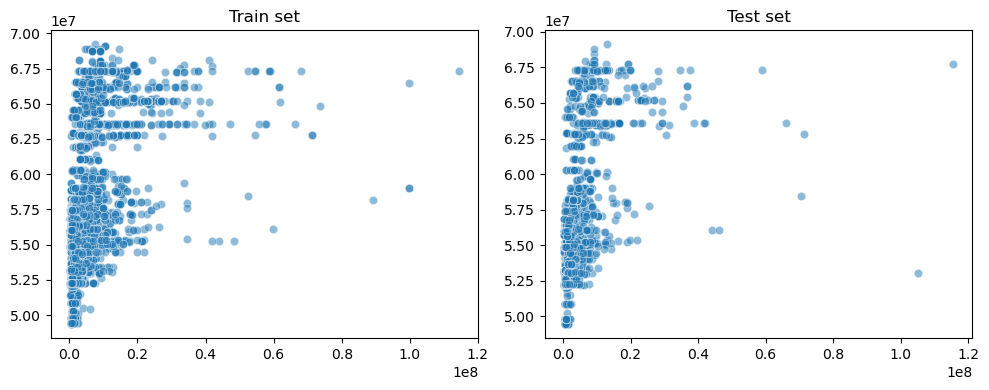

In [160]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)
sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

# 3. Random Forest Model

In [161]:
df_train_8, df_test_2 = train_test_split(df_train, test_size = 0.2, random_state = 42)

all_X_att_train = df_train_8.columns.to_list()
all_X_att_train.remove('price')
X_train, X_test, y_train, y_test = df_train_8[all_X_att_train], df_test_2[all_X_att_train], df_train_8['price'], df_test_2['price']


In [ ]:
RF_estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': list(range(70,100,5)),
    'max_depth': list(range(20,30,2)),
    'min_samples_leaf' : list(range(1,5,1)),
    'min_samples_split' : list(range(1,5,1)),
}
rf = GridSearchCV(RF_estimator, param_grid, verbose=2, cv=5)
rf.fit(X_scaled, y_train)

joblib.dump(rf.best_estimator_, 'rf_model.pkl')

print('Best parameters found by grid search are:', rf.best_params_)
## Result: Best parameters found by grid search are: {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 60}

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=75; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=75; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=75; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=1, n_estimators=75; total time=   0.0s
[CV] END max_depth=20, min_samples_l

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   3.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   3.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   3.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=95; total time=   3.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=95; total time=   3.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=95; total time=   3.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=95; total time=   3.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=95; total time=   3.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=70; total time=   2.8s


[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   3.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=85; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   3.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   3.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   3.3s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=90; total time=   3.4s


[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=80; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=1, n_estimators=90; total time=   0.0s


[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=75; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=80; total time=   2.8s
[CV] END max_depth=20, min_samples_leaf=3, min_samples_split=4, n_estimators=85; total time=   3.0s


[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=95; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=95; total time=   3.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   2.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=70; total time=   2.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=75; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=75; total time=   2.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=3, n_estimators=75; total time=   2.5s


[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=17.5min
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   2.9s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=15.8min
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   2.9s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=15.7min
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   3.1s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=15.7min


[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=85; total time=   3.4s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   3.6s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   3.5s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   3.5s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   3.5s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=90; total time=   3.6s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=95; total time=   3.8s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=95; total time=   3.8s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=95; total time=   3.8s
[CV] END max_depth=22, min_samples_leaf=1, min_samples_split=4, n_estimators=95; total time=   3.8s


[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=80; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=85; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=2, min_samples_split=3, n_estimators=90; total time=   3.4s


[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.6s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   2.8s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   2.8s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=2, n_estimators=80; total time=   2.8s


[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=95; total time=   3.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=95; total time=   3.3s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=95; total time=   3.3s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=95; total time=   3.3s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=95; total time=   3.3s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=1, n_estimators=70; total time=   0.0s


[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=85; total time=   2.8s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=85; total time=   2.8s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=85; total time=   2.9s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=90; total time=   3.0s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=95; total time=   3.2s
[CV] END max_depth=22, min_samples_leaf=4, min_samples_split=3, n_estimators=95; total time=   3.2s


[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=75; total time=   3.2s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=80; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=85; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=85; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=85; total time=   3.6s
[CV] END max_depth=24, min_samples_leaf=1, min_samples_split=2, n_estimators=85; total time=   3.6s


[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=80; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=1, n_estimators=90; total time=   0.0s


[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=75; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=80; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=2, min_samples_split=4, n_estimators=85; total time=   3.2s


[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   3.4s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=2, n_estimators=95; total time=   3.3s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=70; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=75; total time=   2.7s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=75; total time=   2.6s
[CV] END max_depth=24, min_samples_leaf=3, min_samples_split=3, n_estimators=75; total time=   2.7s


[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   2.4s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   2.3s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   2.3s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   2.3s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time=   2.3s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   2.5s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   2.5s


[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=85; total time=   2.8s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   3.1s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   3.0s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=90; total time=   3.1s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=95; total time=   3.2s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=95; total time=   3.3s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=95; total time=   3.5s
[CV] END max_depth=24, min_samples_leaf=4, min_samples_split=4, n_estimators=95; total time=   3.2s


[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   3.3s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   3.4s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   3.3s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=80; total time=   3.3s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=85; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=85; total time=   3.5s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=85; total time=   3.5s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=85; total time=   3.5s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=85; total time=   3.5s
[CV] END max_depth=26, min_samples_leaf=1, min_samples_split=3, n_estimators=90; total time=   3.8s


[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=70; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   3.1s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   3.0s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=2, n_estimators=80; total time=   3.0s


[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=95; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=95; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=95; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=95; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=2, min_samples_split=4, n_estimators=95; total time=   3.6s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=1, n_estimators=70; total time=   0.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=1, n_estimators=70; total time=   0.0s


[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=85; total time=   3.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=85; total time=   3.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=85; total time=   3.0s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=90; total time=   3.2s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=95; total time=   3.4s
[CV] END max_depth=26, min_samples_leaf=3, min_samples_split=3, n_estimators=95; total time=   3.3s


[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=75; total time=   2.5s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   2.7s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=80; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=85; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=85; total time=   2.8s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=85; total time=   2.9s
[CV] END max_depth=26, min_samples_leaf=4, min_samples_split=2, n_estimators=85; total time=   2.8s


[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=80; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=85; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=90; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=1, n_estimators=90; total time=   0.0s


[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   2.9s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   3.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   3.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=75; total time=   3.0s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   3.3s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   3.2s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   3.2s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   3.2s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=80; total time=   3.2s
[CV] END max_depth=28, min_samples_leaf=1, min_samples_split=4, n_estimators=85; total time=   3.5s


[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=2, n_estimators=95; total time=   3.7s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=2, n_estimators=95; total time=   3.6s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   2.7s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   2.7s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   2.7s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   2.7s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=70; total time=   2.6s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=75; total time=   2.9s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=75; total time=   2.9s
[CV] END max_depth=28, min_samples_leaf=2, min_samples_split=3, n_estimators=75; total time=   2.8s


[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=1, n_estimators=95; total time=   0.0s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=70; total time=   2.5s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.7s
[CV] END max_depth=28, min_samples_leaf=3, min_samples_split=2, n_estimators=75; total time=   2.7s


In [ ]:
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train.ravel(),
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test.ravel(),
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()